In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.models import save_model
import h5py

In [ ]:
from keras.layers import Flatten,Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,LeakyReLU
from keras.models import Model
from keras import backend as K


# input shape of the Autoencoder
input_img = Input(shape=(100, 150, 3))

# encoder
x = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 3), padding='same')(x)
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)

# decoder
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 3))(x)
x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

# autoencoder model
autoencoder = Model(input_img, decoded)

# optimiser and loss function intialization
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
from keras.models import load_model,save_model
import numpy as np
import time
import h5py
from IPython.display import clear_output

for e range(1,6):
    for i in range(1,25):
        
        # read a set of data and train the network on that
        # as i am working pc has only 8gb ram
        # so it is impossible to load whole data in ram
        images = np.load("TrafficDataset/x"+str(i)+".npy")
        densityimage = np.load("TrafficDataset/y"+str(i)+".npy")

        print("data :"+str(i))
        images = images.reshape(200,100,150,3)
        densityimage = densityimage.reshape(200,100,150,1)
        images = images
        
        # training on the data
        autoencoder.fit(images[0:200], densityimage[0:200],
                    epochs=10,
                    batch_size=10)

        
        clear_output()

        # cool down for PC (5mins)
        time.sleep(5*60)
        
    print("done epoch : "+str(e))

    #save the model after each 10 epochs
    save_model(autoencoder,"V1/v1_e"+str(filee)+".h5py")-

In [1]:
from keras.models import load_model
import h5py
# loading a model
autoencoder = load_model('Model/good_v1.h5py')

Using TensorFlow backend.


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

# test an image over model 
image = cv2.imread('image.png')

dst = cv2.resize(image, (150, 100), interpolation = cv2.INTER_CUBIC)
dst = np.array(dst)
print(dst.shape)

(100, 150, 3)


(100, 150)


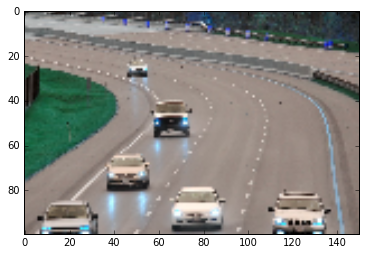

In [28]:
#dst = images[150]
fig,ax = plt.subplots(1)
dst1 = dst.reshape(1,100,150,3)

ans  = autoencoder.predict(dst1)

ans=np.array(ans)
ans = ans.reshape(100,150)

#ax1.imshow(images[400])
print(np.array(ans).shape)
ax.imshow(dst)

True

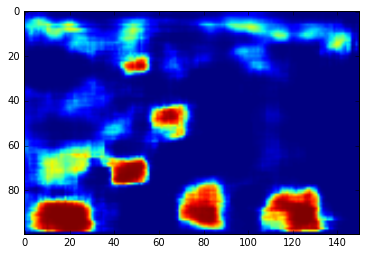

In [29]:
fig,ax1 = plt.subplots(1)
ax1.imshow(ans)

output= ans*255
cv2.imwrite('out2.png',output)

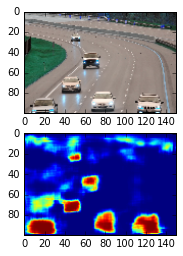

In [30]:
fig,ax2 = plt.subplots(2)
ax2[0].imshow(dst)
ax2[1].imshow(ans)
